In [1]:
#Import necessary libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('chest_xray'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

chest_xray\test\NORMAL\IM-0001-0001.jpeg
chest_xray\test\NORMAL\IM-0003-0001.jpeg
chest_xray\test\NORMAL\IM-0005-0001.jpeg
chest_xray\test\NORMAL\IM-0006-0001.jpeg
chest_xray\test\NORMAL\IM-0007-0001.jpeg
chest_xray\test\NORMAL\IM-0009-0001.jpeg
chest_xray\test\NORMAL\IM-0010-0001.jpeg
chest_xray\test\NORMAL\IM-0011-0001-0001.jpeg
chest_xray\test\NORMAL\IM-0011-0001-0002.jpeg
chest_xray\test\NORMAL\IM-0011-0001.jpeg
chest_xray\test\NORMAL\IM-0013-0001.jpeg
chest_xray\test\NORMAL\IM-0015-0001.jpeg
chest_xray\test\NORMAL\IM-0016-0001.jpeg
chest_xray\test\NORMAL\IM-0017-0001.jpeg
chest_xray\test\NORMAL\IM-0019-0001.jpeg
chest_xray\test\NORMAL\IM-0021-0001.jpeg
chest_xray\test\NORMAL\IM-0022-0001.jpeg
chest_xray\test\NORMAL\IM-0023-0001.jpeg
chest_xray\test\NORMAL\IM-0025-0001.jpeg
chest_xray\test\NORMAL\IM-0027-0001.jpeg
chest_xray\test\NORMAL\IM-0028-0001.jpeg
chest_xray\test\NORMAL\IM-0029-0001.jpeg
chest_xray\test\NORMAL\IM-0030-0001.jpeg
chest_xray\test\NORMAL\IM-0031-0001.jpeg
chest_

In [2]:
import os
from PIL import Image
import itertools

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, Activation, BatchNormalization
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('ignore')

print('Modules Loaded')

Modules Loaded


In [3]:
train_data = 'chest_xray/train'
filepaths = []
labels = []

folds = os.listdir(train_data)
for fold in folds:
    foldpath = os.path.join(train_data, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

df = pd.concat([FSeries, LSeries], axis=1)
df

filepaths      label
0             chest_xray/train\NORMAL\IM-0115-0001.jpeg     NORMAL
1             chest_xray/train\NORMAL\IM-0117-0001.jpeg     NORMAL
2             chest_xray/train\NORMAL\IM-0119-0001.jpeg     NORMAL
3             chest_xray/train\NORMAL\IM-0122-0001.jpeg     NORMAL
4             chest_xray/train\NORMAL\IM-0125-0001.jpeg     NORMAL
...                                                 ...        ...
5211  chest_xray/train\PNEUMONIA\person99_virus_183....  PNEUMONIA
5212  chest_xray/train\PNEUMONIA\person9_bacteria_38...  PNEUMONIA
5213  chest_xray/train\PNEUMONIA\person9_bacteria_39...  PNEUMONIA
5214  chest_xray/train\PNEUMONIA\person9_bacteria_40...  PNEUMONIA
5215  chest_xray/train\PNEUMONIA\person9_bacteria_41...  PNEUMONIA

[5216 rows x 2 columns]

In [4]:
valid_data = 'chest_xray/val'
filepaths = []
labels = []

folds = os.listdir(valid_data)
for fold in folds:
    foldpath = os.path.join(valid_data, fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

valid = pd.concat([FSeries, LSeries], axis=1)
valid

filepaths      label
0     chest_xray/val\NORMAL\NORMAL2-IM-1427-0001.jpeg     NORMAL
1     chest_xray/val\NORMAL\NORMAL2-IM-1430-0001.jpeg     NORMAL
2     chest_xray/val\NORMAL\NORMAL2-IM-1431-0001.jpeg     NORMAL
3     chest_xray/val\NORMAL\NORMAL2-IM-1436-0001.jpeg     NORMAL
4     chest_xray/val\NORMAL\NORMAL2-IM-1437-0001.jpeg     NORMAL
5     chest_xray/val\NORMAL\NORMAL2-IM-1438-0001.jpeg     NORMAL
6     chest_xray/val\NORMAL\NORMAL2-IM-1440-0001.jpeg     NORMAL
7     chest_xray/val\NORMAL\NORMAL2-IM-1442-0001.jpeg     NORMAL
8   chest_xray/val\PNEUMONIA\person1946_bacteria_4...  PNEUMONIA
9   chest_xray/val\PNEUMONIA\person1946_bacteria_4...  PNEUMONIA
10  chest_xray/val\PNEUMONIA\person1947_bacteria_4...  PNEUMONIA
11  chest_xray/val\PNEUMONIA\person1949_bacteria_4...  PNEUMONIA
12  chest_xray/val\PNEUMONIA\person1950_bacteria_4...  PNEUMONIA
13  chest_xray/val\PNEUMONIA\person1951_bacteria_4...  PNEUMONIA
14  chest_xray/val\PNEUMONIA\person1952_bacteria_4...  PNEUMONIA
15  chest_xray/val\PNEUMONIA\person1954_bacteria_4...  PNEUMONIA

In [5]:
test_data = 'chest_xray/test'
filepaths = []
labels = []

folds = os.listdir(test_data)

for fold in folds:
    foldpath = os.path.join(test_data,fold)
    filelist = os.listdir(foldpath)
    
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        
        filepaths.append(fpath)
        labels.append(fold)
        
FSeries = pd.Series(filepaths, name='filepaths')
LSeries = pd.Series(labels, name='label')

test = pd.concat([FSeries, LSeries], axis=1)
test

filepaths      label
0            chest_xray/test\NORMAL\.ipynb_checkpoints     NORMAL
1             chest_xray/test\NORMAL\IM-0001-0001.jpeg     NORMAL
2             chest_xray/test\NORMAL\IM-0003-0001.jpeg     NORMAL
3             chest_xray/test\NORMAL\IM-0005-0001.jpeg     NORMAL
4             chest_xray/test\NORMAL\IM-0006-0001.jpeg     NORMAL
..                                                 ...        ...
620  chest_xray/test\PNEUMONIA\person96_bacteria_46...  PNEUMONIA
621  chest_xray/test\PNEUMONIA\person96_bacteria_46...  PNEUMONIA
622  chest_xray/test\PNEUMONIA\person97_bacteria_46...  PNEUMONIA
623  chest_xray/test\PNEUMONIA\person99_bacteria_47...  PNEUMONIA
624  chest_xray/test\PNEUMONIA\person99_bacteria_47...  PNEUMONIA

[625 rows x 2 columns]

In [6]:
train_df, dummy_df = train_test_split(df,train_size=0.8,shuffle=True, random_state=42)
valid_df, test_df = train_test_split(dummy_df, train_size=0.5,shuffle=True, random_state=42)

In [7]:
batch_size = 16
img_size = (150, 150)

tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()
val_gen= ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = val_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'label', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.


In [8]:
from collections import Counter

# Analyze class distribution in train data
class_counts = Counter(train_gen.classes)
print(f"Class Distribution in Training Set: {class_counts}")


Class Distribution in Training Set: Counter({1: 3118, 0: 1054})


In [14]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weight = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_gen.classes),
    y=train_gen.classes
)

class_weight_dict = dict(enumerate(class_weight))
print(f"Class Weights: {class_weight_dict}")

Class Weights: {0: 1.9791271347248578, 1: 0.6690186016677357}


In [15]:
import pandas as pd

# Duplicate NORMAL class samples
normal_df = train_df[train_df['label'] == 'NORMAL']
pneumonia_df = train_df[train_df['label'] == 'PNEUMONIA']

# Oversample the NORMAL class
normal_df_oversampled = normal_df.sample(n=len(pneumonia_df), replace=True, random_state=42)

# Combine and shuffle
train_df_balanced = pd.concat([normal_df_oversampled, pneumonia_df]).sample(frac=1, random_state=42).reset_index(drop=True)

# Create a new generator with the balanced dataset
train_gen_balanced = tr_gen.flow_from_dataframe(
    train_df_balanced,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size
)

Found 6236 validated image filenames belonging to 2 classes.


In [16]:
# Count samples after balancing
balanced_class_counts = Counter(train_gen_balanced.classes)
for class_index, count in balanced_class_counts.items():
    print(f"Class '{class_labels[class_index]}' ({class_index}): {count} samples")

Class 'NORMAL' (0): 3118 samples
Class 'PNEUMONIA' (1): 3118 samples


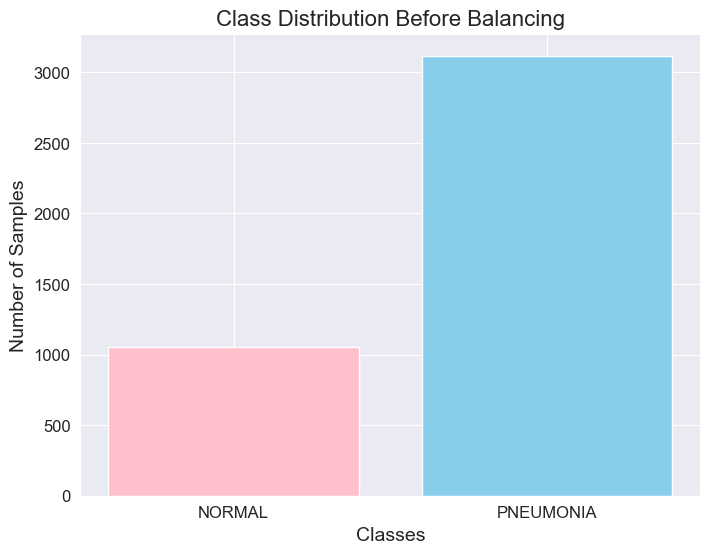

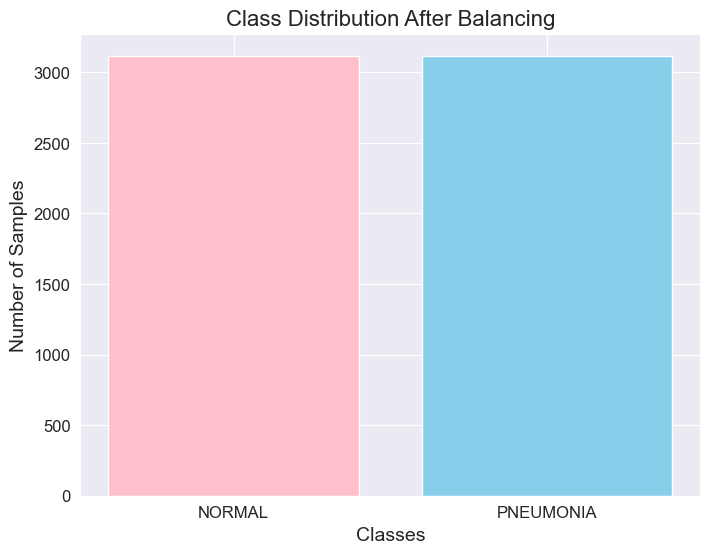

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

# Function to plot class distribution
def plot_class_distribution(class_counts, title):
    classes = list(class_counts.keys())
    counts = list(class_counts.values())
    
    plt.figure(figsize=(8, 6))
    plt.bar(classes, counts, color=['pink', 'skyblue'])
    plt.xlabel("Classes", fontsize=14)
    plt.ylabel("Number of Samples", fontsize=14)
    plt.title(title, fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

# Before balancing
original_class_counts = Counter(train_gen.classes)
class_labels = {v: k for k, v in train_gen.class_indices.items()}  # Map index to label
original_class_counts_named = {class_labels[k]: v for k, v in original_class_counts.items()}
plot_class_distribution(original_class_counts_named, "Class Distribution Before Balancing")

# After balancing
balanced_class_counts = Counter(train_gen_balanced.classes)
balanced_class_counts_named = {class_labels[k]: v for k, v in balanced_class_counts.items()}
plot_class_distribution(balanced_class_counts_named, "Class Distribution After Balancing")

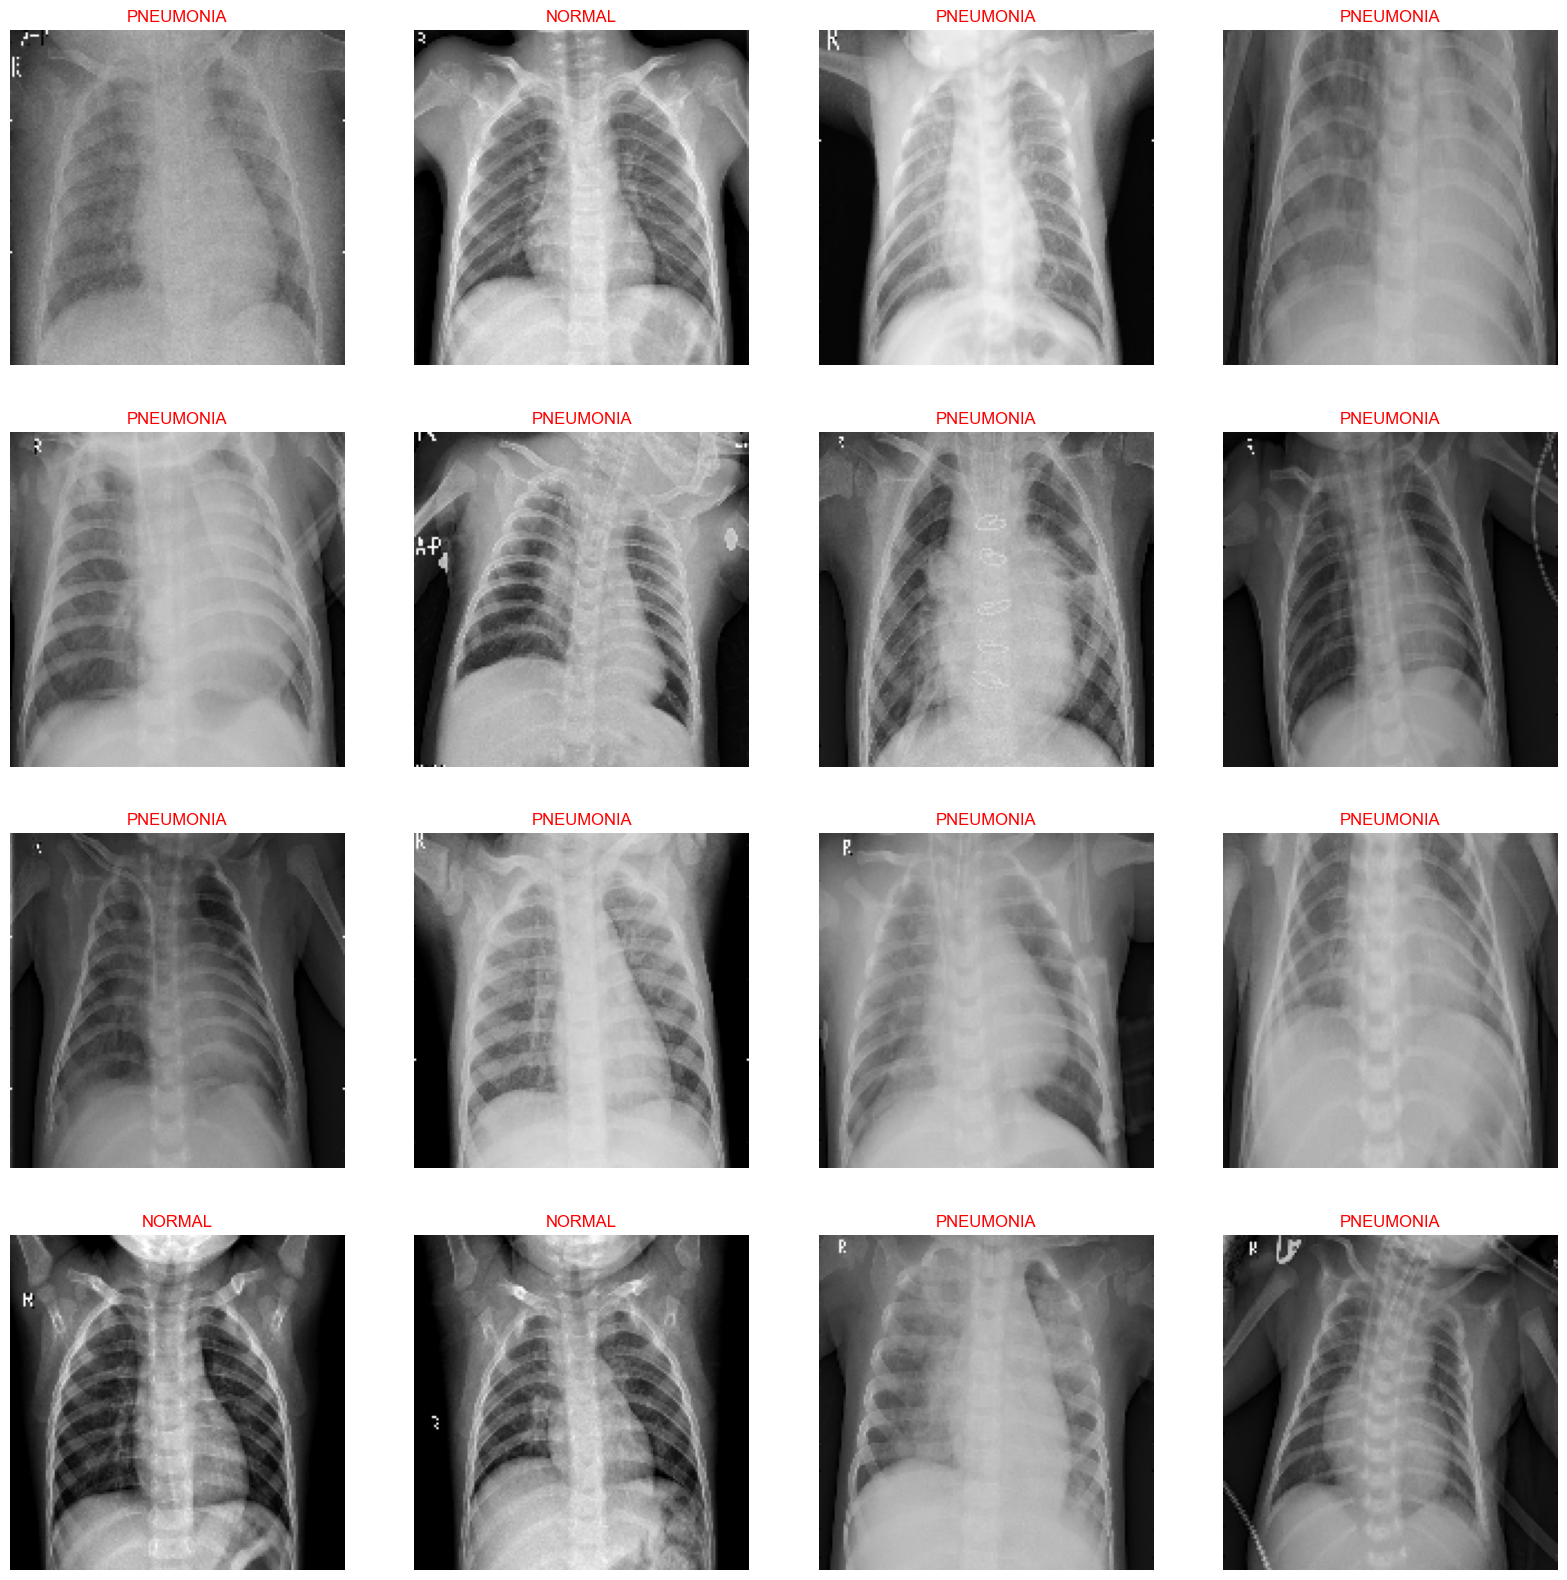

In [24]:
gen_dict = train_gen.class_indices
classes = list(gen_dict.keys())
images, labels = next(train_gen)
images, labels = next(test_gen)

plt.figure(figsize=(20, 20))

for i in range(16): 
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255.0
    plt.imshow(image)
    index = np.argmax(labels[i])
    class_name = classes[index]
    plt.title(class_name, color='red', fontsize=12)
    plt.axis('off')

plt.show()

In [30]:
for images, labels in train_gen_balanced:
    print(f"Batch shape: {images.shape}")
    break

Batch shape: (16, 150, 150, 3)


In [31]:
img_size = (224, 224)  # For VGG16 or ResNet, this is often the default input size

train_gen_balanced = tr_gen.flow_from_dataframe(
    train_df_balanced,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,  # Match the input size
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

valid_gen = val_gen.flow_from_dataframe(
    valid_df,
    x_col='filepaths',
    y_col='label',
    target_size=img_size,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True
)

Found 6236 validated image filenames belonging to 2 classes.
Found 522 validated image filenames belonging to 2 classes.


In [32]:
img_size = (224, 224)

from tensorflow.keras.applications import VGG16
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

# Load VGG16 base model
base_model = VGG16(include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    MaxPooling2D((2, 2)),

    Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu", input_shape= img_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),


    Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(256,activation = "relu"),
    Dropout(0.3),
    Dense(128,activation = "relu"),
    Dropout(0.3),
    Dense(class_count, activation = "softmax")
])

In [33]:
model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 14, 14, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,514 (30.61 MB)

 Trainable params: 8,024,514 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(
    train_gen_balanced,
    validation_data=valid_gen,
    epochs=10,
    verbose=1
)

Epoch 1/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 391s 980ms/step - accuracy: 0.8276 - loss: 1.7299 - val_accuracy: 0.9751 - val_loss: 0.0683
Epoch 2/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 421s 1s/step - accuracy: 0.9739 - loss: 0.0732 - val_accuracy: 0.9655 - val_loss: 0.0985
Epoch 3/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 713s 2s/step - accuracy: 0.9861 - loss: 0.0481 - val_accuracy: 0.9732 - val_loss: 0.0782
Epoch 4/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 657s 2s/step - accuracy: 0.9859 - loss: 0.0421 - val_accuracy: 0.9751 - val_loss: 0.0809
Epoch 5/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 398s 953ms/step - accuracy: 0.9933 - loss: 0.0224 - val_accuracy: 0.9808 - val_loss: 0.0680
Epoch 6/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 370s 948ms/step - accuracy: 0.9929 - loss: 0.0214 - val_accuracy: 0.9693 - val_loss: 0.0942
Epoch 7/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 455s 1s/step - accuracy: 0.9949 - loss: 0.0179 - val_accuracy: 0.9808 - val_loss: 0.0594
Epoch 8/10
390/390 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.9983 - loss: 0.0075 -

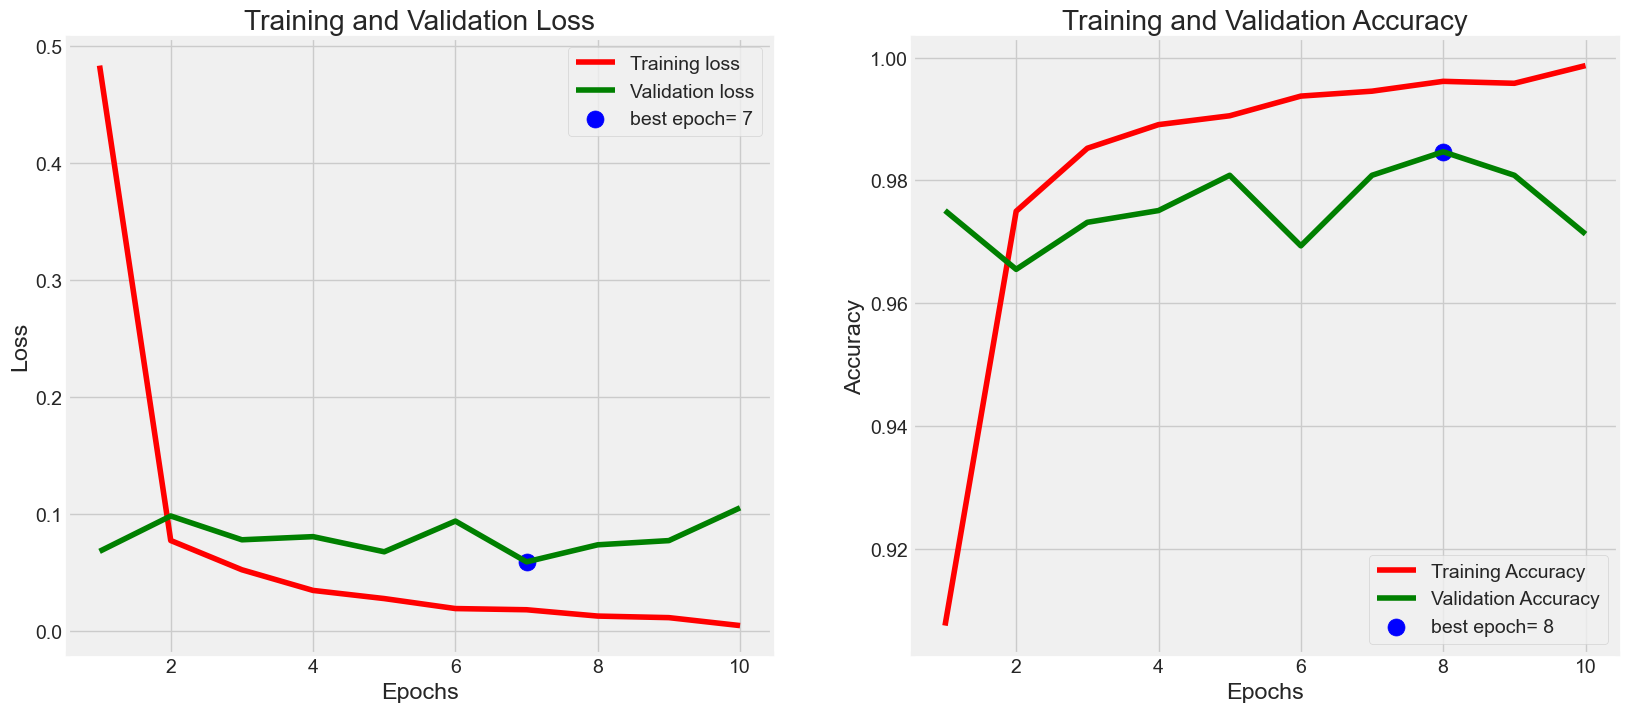

In [35]:
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your test directory
test_dir = 'chest_xray/test'

# Create an ImageDataGenerator for preprocessing
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create a test generator to load the images from the directory
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Adjust the target size to match the input size of your model
    batch_size=32,           # Adjust batch size as needed
    class_mode='categorical'      # Or 'categorical' depending on your problem
)

Found 625 images belonging to 2 classes.


In [59]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6277 - loss: 0.6530
Test Loss: 0.6544414758682251
Test Accuracy: 0.6240000128746033


In [49]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the path to your test directory
test_dir = 'chest_xray/test'

# Adjust target_size based on the model's expected input size (e.g., 224x224 for VGG16)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the test generator with the resized image shape
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),  # Resize images to 224x224 if needed
    batch_size=32,
    class_mode='categorical'  # Change to 'binary' if it's a binary classification task
)

# Now make predictions on the test set
preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

Found 625 images belonging to 2 classes.
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step


20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - accuracy: 0.6585 - loss: 0.6413
Test Accuracy: 0.6240000128746033
20/20 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step


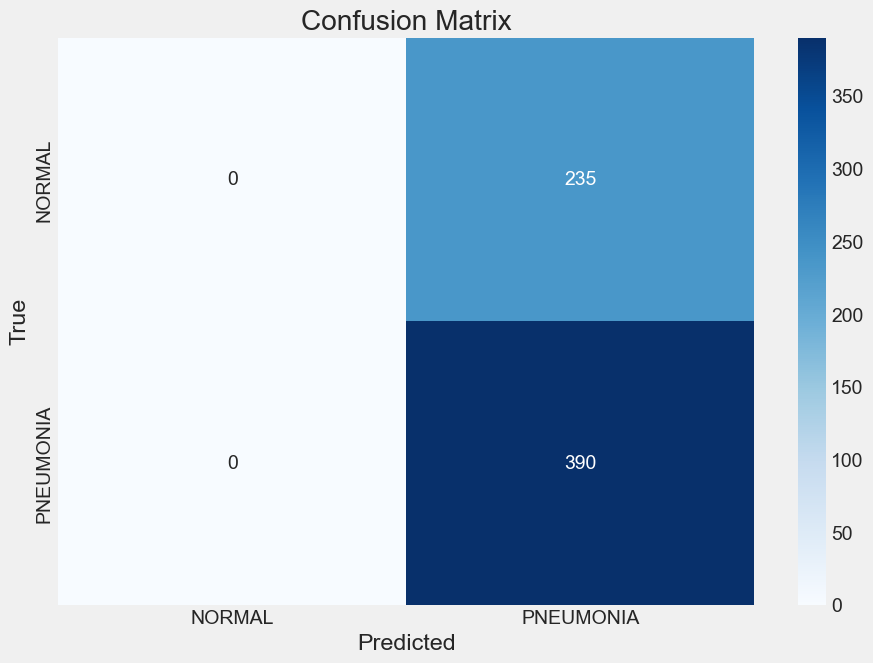

Class distribution in test set: [235 390]
First 10 predicted probabilities:
 [[0.40387747 0.59612244]
 [0.39988828 0.6001117 ]
 [0.4045461  0.5954539 ]
 [0.40418115 0.5958189 ]
 [0.3981935  0.60180646]
 [0.40154433 0.5984557 ]
 [0.40968803 0.59031194]
 [0.39854905 0.601451  ]
 [0.40282446 0.59717554]
 [0.40526828 0.59473175]]
Classification Report:
               precision    recall  f1-score   support

      NORMAL       0.00      0.00      0.00       235
   PNEUMONIA       0.62      1.00      0.77       390

    accuracy                           0.62       625
   macro avg       0.31      0.50      0.38       625
weighted avg       0.39      0.62      0.48       625



In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have the test generator (test_gen) and the model ready

# Step 1: Model Evaluation on Test Set
loss, accuracy = model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {accuracy}")

# Step 2: Get true labels
y_true = test_generator.classes  # True labels from the test data

# Step 3: Get predicted labels
y_pred_probs = model.predict(test_generator, steps=len(test_generator))  # Predicted probabilities
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to predicted class labels

# Step 4: Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Step 5: Check class distribution in the test set
class_distribution = np.bincount(y_true)
print("Class distribution in test set:", class_distribution)

# Step 6: Inspect the first 10 predicted probabilities
print("First 10 predicted probabilities:\n", y_pred_probs[:10])

# Step 7: Inspect the accuracy per class (optional)
from sklearn.metrics import classification_report
print("Classification Report:\n", classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))


In [64]:
from sklearn.metrics import classification_report
print(classification_report(test_generator.classes,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       235
           1       0.62      1.00      0.77       390

    accuracy                           0.62       625
   macro avg       0.31      0.50      0.38       625
weighted avg       0.39      0.62      0.48       625



20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 477ms/step


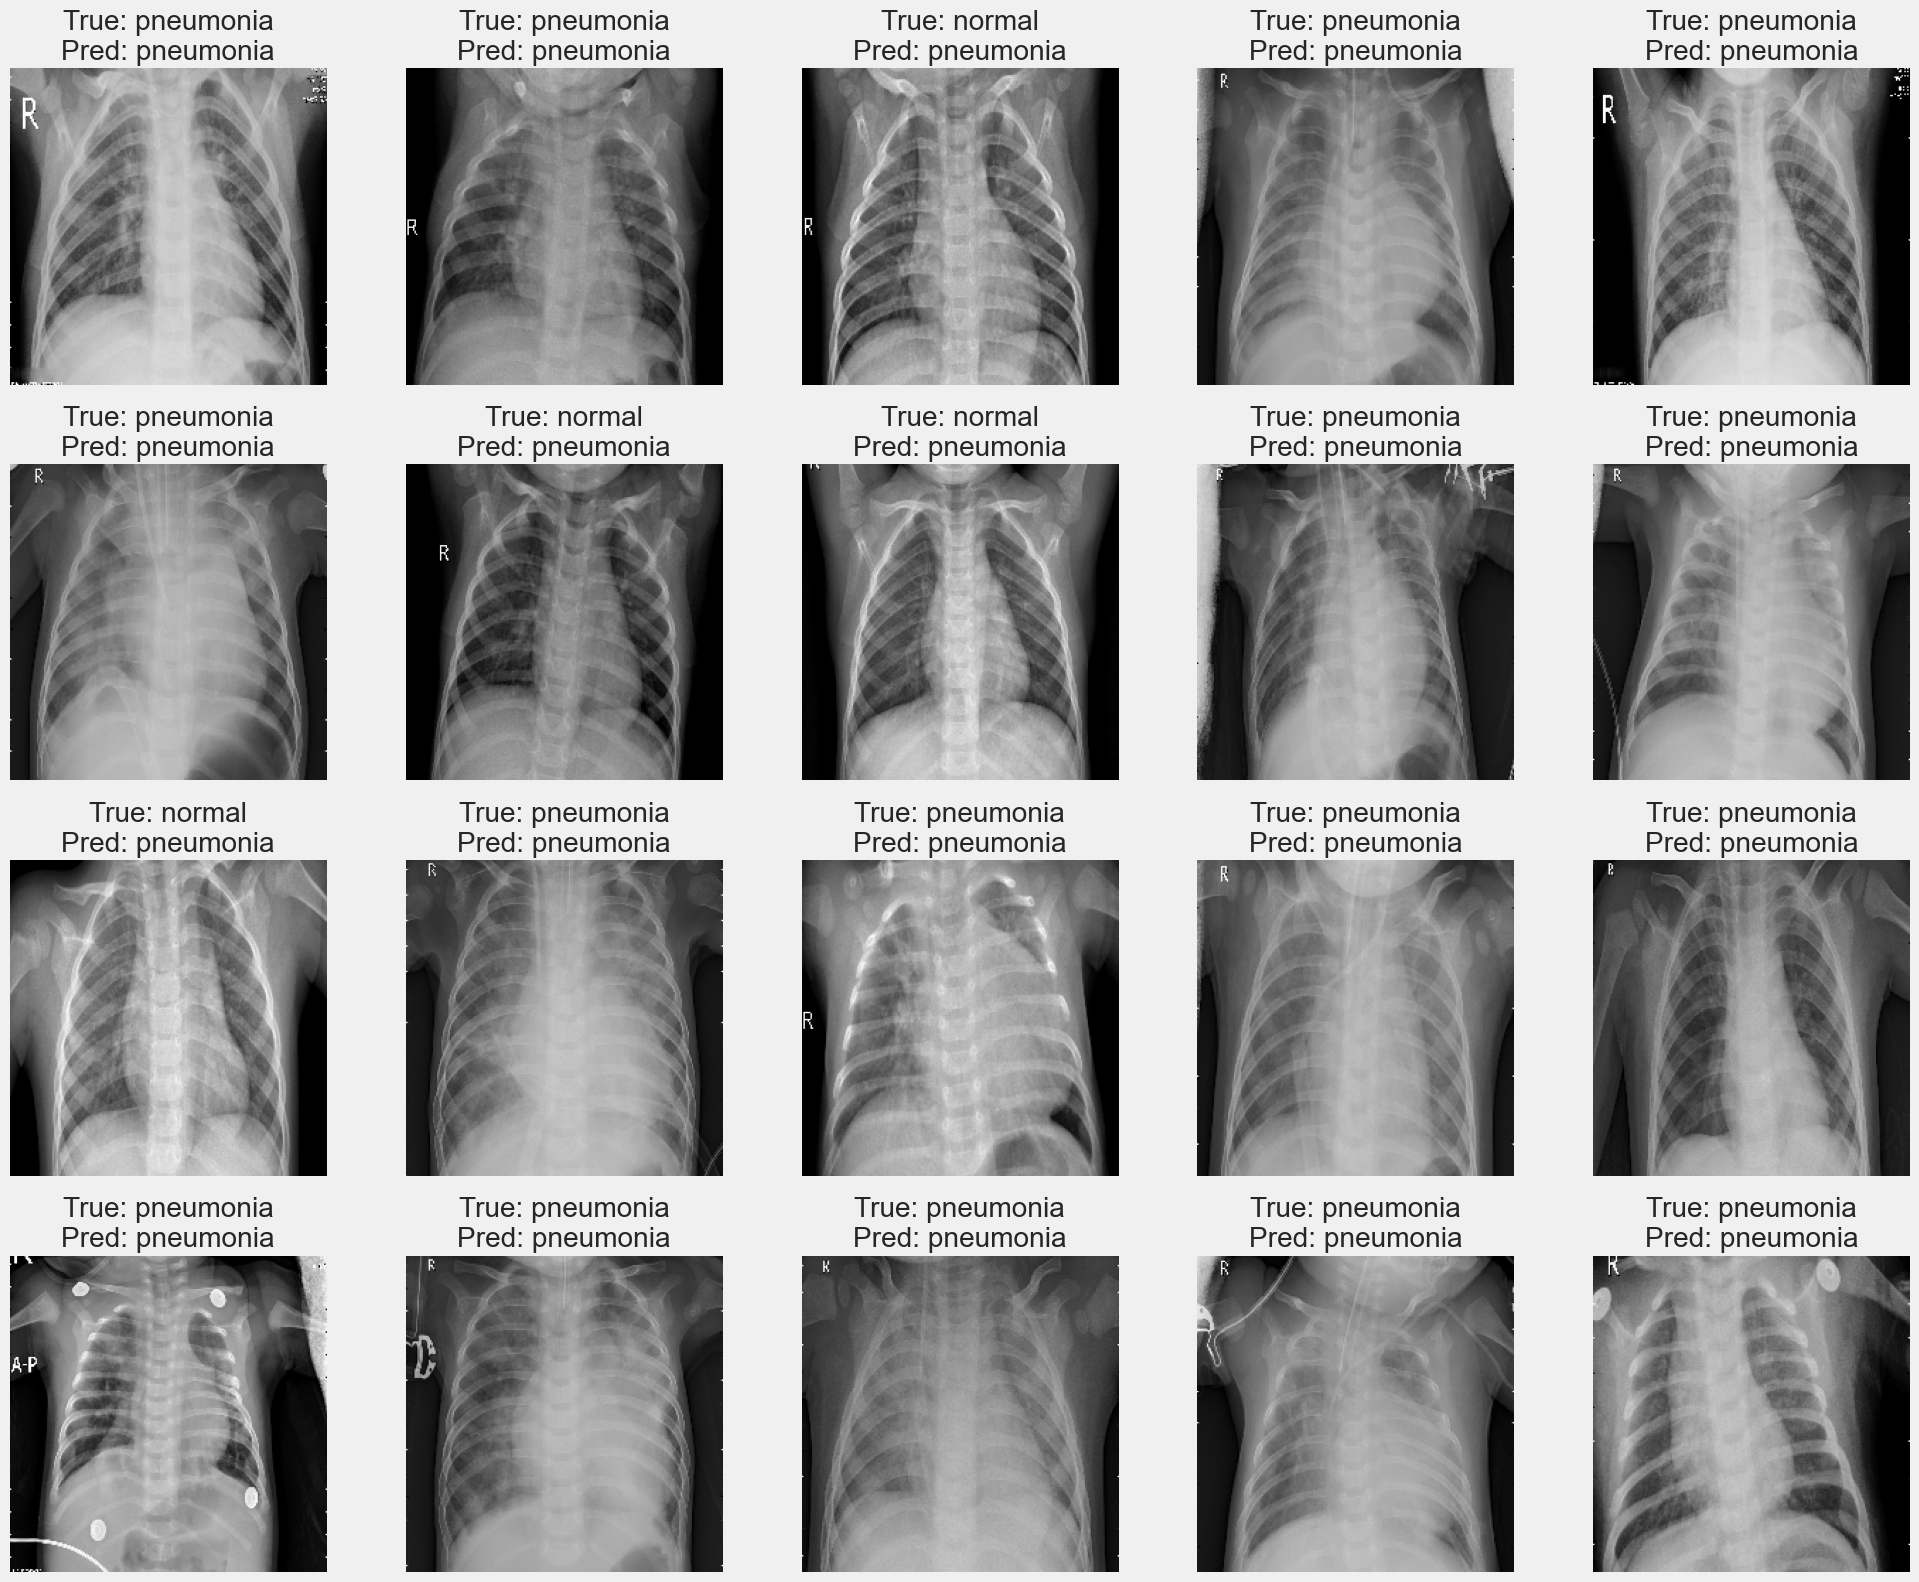

In [67]:
import numpy as np
import matplotlib.pyplot as plt

preds = model.predict(test_generator)
y_pred = np.argmax(preds, axis=1)

g_dict = test_generator.class_indices
classes = list(g_dict.keys())

plt.figure(figsize=(20,20))

num_images = len(test_generator)
for i in range(min(num_images, 25)):
    img, label = test_generator[i][0][0], test_generator[i][1][0]
    true_label_index = np.argmax(label) 
    true_label = 'normal' if true_label_index == 0 else 'pneumonia'
    
    predicted_label = 'normal' if y_pred[i] == 0 else 'pneumonia'
    
    img = img * 255  
    img = img.astype(np.uint8) 

    plt.subplot(5, 5, i + 1)
    plt.imshow(img)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [80]:
model.save("Pneumonia_detection.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


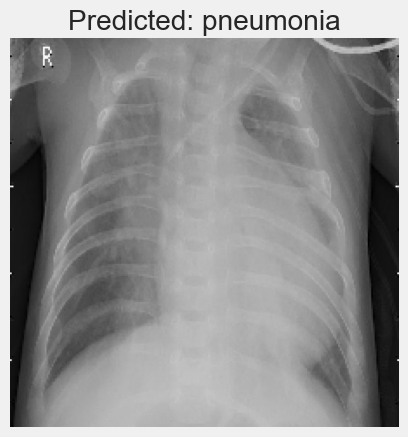

Predicted class: pneumonia


In [91]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import load_model

# Load the model (if not already loaded)
# model = load_model('your_model_path.h5')  # Uncomment and specify the correct model path

# Path to the image you want to classify
image_path = 'chest_xray/test/PNEUMONIA/person1_virus_11.jpeg'  # Replace with your image path

# Load the image with the target size (same size as input to your model)
img = image.load_img(image_path, target_size=(224, 224))  # Replace with your model's expected input size
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Preprocess the image (if using a model like VGG16)
img_array = preprocess_input(img_array)

# Get predictions
preds = model.predict(img_array)
y_pred = np.argmax(preds, axis=1)

# Decode the prediction
class_names = ['normal', 'pneumonia']  # Replace with your class names
predicted_class = class_names[y_pred[0]]

# Display the image and prediction
plt.imshow(img)
plt.title(f'Predicted: {predicted_class}')
plt.axis('off')
plt.show()

print(f"Predicted class: {predicted_class}")
